# Multiple_Linear_Regression_Bike_Sharing_Assignment

### **Problem Statement**  
BoomBikes, a bike-sharing service in the US, has been severely impacted by the pandemic, leading to a significant drop in revenue. To bounce back and prepare for a post-lockdown world, they aim to gain a deeper understanding of the demand for shared bikes. Their objective is to identify the key factors influencing bike rentals and how these factors affect daily demand.

By analyzing a rich dataset that includes weather conditions and user trends, BoomBikes seeks to fine-tune their business strategies to meet future demand, enhance customer satisfaction, and distinguish themselves in a competitive market.

---

### **The Company Wants to Know:**  
- **Which variables are key in predicting bike demand?**  
- **How do these variables shape the demand for shared bikes?**

---

### **Goal:**  
- ✨ **Develop a model** to identify the most significant factors influencing bike demand.  
- 🧠 **Utilize available independent variables** to predict future bike demand.  
- 📊 **Provide actionable insights** to help BoomBikes' management refine business strategies.  
- 🚴‍♂️ **Enable BoomBikes to meet customer expectations** and optimize demand levels.


## 1: Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score
warnings.filterwarnings('ignore')

## Step2: Reading Dataset and Understanding Data

In [2]:
csv_bike = pd.read_csv('day.csv')

In [3]:
csv_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
csv_bike.shape

(730, 16)

In [5]:
df_bike = pd.DataFrame(csv_bike)


In [6]:
print(df_bike['season'].unique())

[1 2 3 4]


In [7]:
print(df_bike['weathersit'].unique())

[2 1 3]


In [8]:
df_bike.columns


Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [9]:
df_bike.ndim

2

In [10]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Cleaning Data

In [11]:
# Check basic structure
df_bike.info()
# Handle missing values
# Check for null values
print(df_bike.isnull().sum())

# Check descriptive statistics
print(df_bike.describe())
#creating new column catagory for knowing how old the business turned during specific registered moments.
df_bike['days_old'] = (pd.to_datetime(df_bike['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday      

### Convert 'dteday' to datetime

###### As the shape is same after dropping duplicates, that means there are no duplicates in the original dataframe as well.

In [12]:
# dropping the unwanted columns
# instant has only index for the row, dteday has date which can be compensated by year and month column,
# casual and registered seems to be the breakup by category for cnt column.

df_bike.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [13]:
df_bike.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [14]:
# Check the head of the dataset

df_bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt,days_old
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


In [15]:
# Copying the dataframe into new

df_copy = df_bike.copy()

In [16]:
df_copy.shape

(730, 13)

In [17]:
# dropping the duplicates

df_copy.drop_duplicates(inplace=True)

In [18]:
# re-verifying the shape of new dataframe

df_copy.shape

(730, 13)

In [19]:
# Encoding/mapping the season column
df_bike = df_copy
df_bike.season = df_bike.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [20]:
# Encoding/mapping the month column
df_bike.month = df_bike.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [21]:
# Encoding/mapping the weekday column

df_bike.weekday = df_bike.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [22]:
# Encoding/mapping the weathersit column

df_bike.weathersit = df_bike.weathersit.map({1:'Clear',2:'Misty',3:'Light Rain/Snow',4:'Stormy'})


In [23]:
# check the head of the dataset

df_bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt,days_old
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,4


In [24]:
# check the column info of the dataset

df_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  days_old    730 non-null    int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 79.8+ KB


In [25]:
df_bike.weathersit.value_counts()

Clear              463
Misty              246
Light Rain/Snow     21
Name: weathersit, dtype: int64

In [26]:
df_bike.corr()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,days_old
year,1.000000,0.008195,-0.011852,0.048789,0.047215,-0.112547,-0.011624,0.569728,0.866026
holiday,0.008195,1.000000,-0.257009,-0.028764,-0.032703,-0.015662,0.006257,-0.068764,0.016275
workingday,-0.011852,-0.257009,1.000000,0.002044,0.010657,0.053770,-0.002453,-0.027640,-0.015171
temp,0.048789,-0.028764,0.002044,1.000000,0.991696,0.128565,-0.158186,0.627044,0.150738
atemp,0.047215,-0.032703,0.010657,0.991696,1.000000,0.141512,-0.183876,0.630685,0.152773
humidity,-0.112547,-0.015662,0.053770,0.128565,0.141512,1.000000,-0.248506,-0.098543,0.016080
windspeed,-0.011624,0.006257,-0.002453,-0.158186,-0.183876,-0.248506,1.000000,-0.235132,-0.112667
cnt,0.569728,-0.068764,-0.027640,0.627044,0.630685,-0.098543,-0.235132,1.000000,0.629896
days_old,0.866026,0.016275,-0.015171,0.150738,0.152773,0.016080,-0.112667,0.629896,1.000000


### Handle Outliers

we can see that features like season, mnth, weekday and weathersit are integers although they should be non-numerical categories.

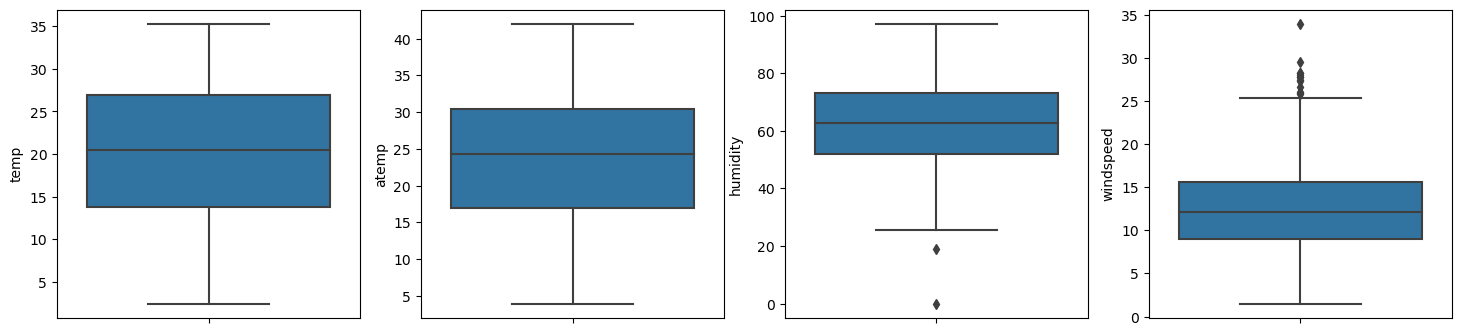

In [27]:
# Draw box plots for indepent variables with continuous values
cols = ['temp', 'atemp', 'humidity', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=df_bike)
    i+=1

## 4. EDA

From these plots, we can see there are no outliers to be handled. We are good with not having any outliers in the data set

#### Drawing pair plots to check the linear relationship

<Figure size 1500x3000 with 0 Axes>

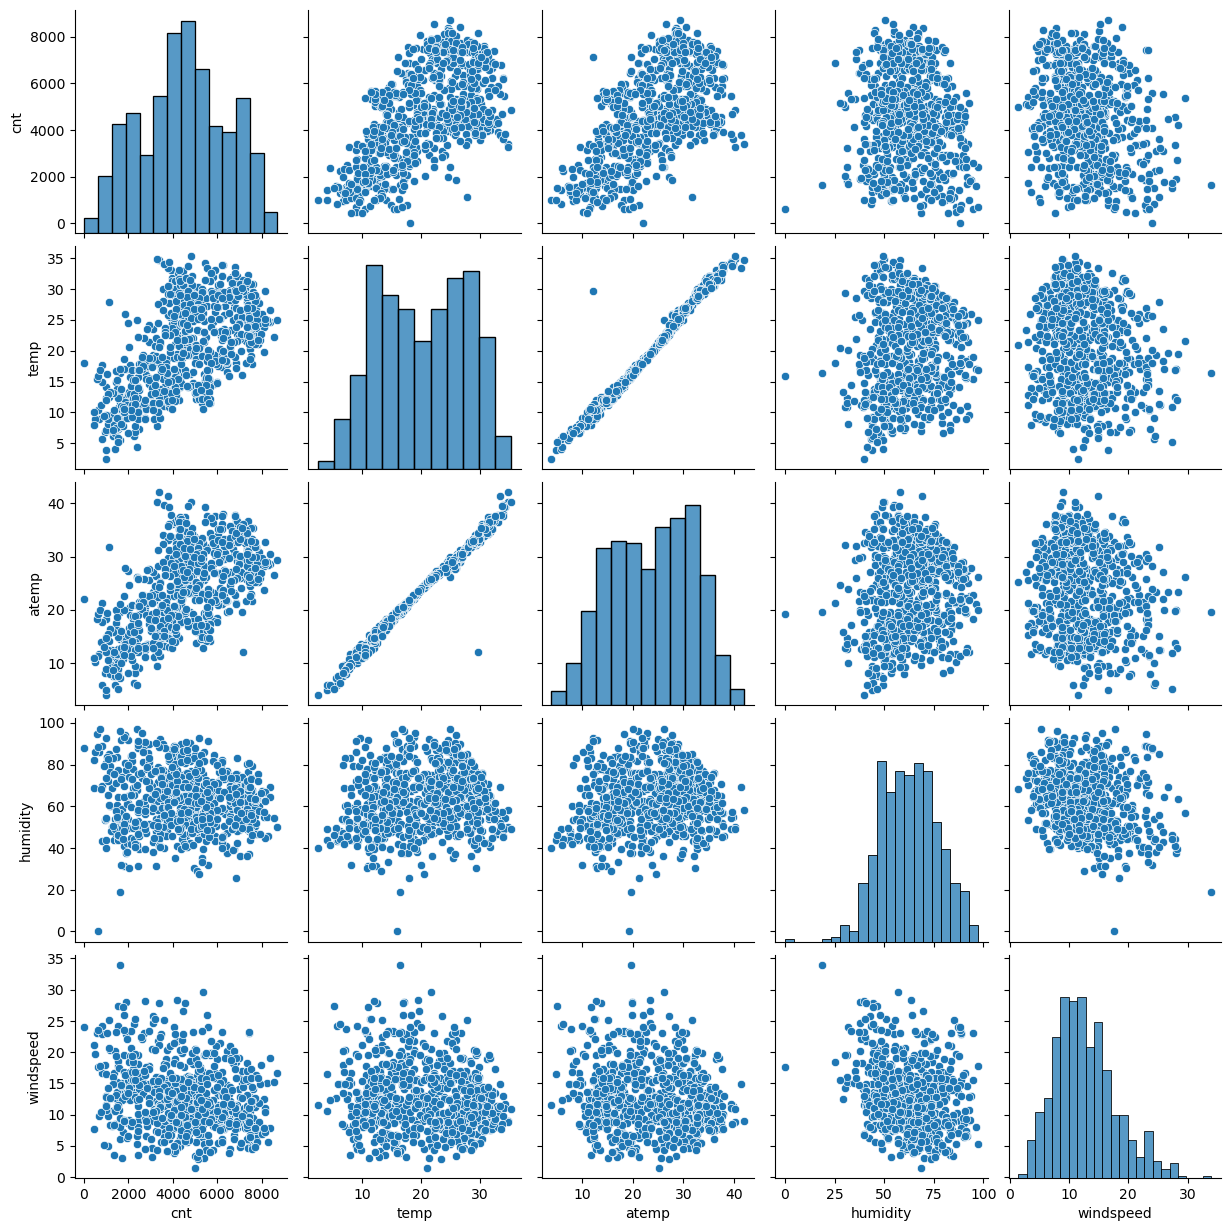

In [28]:
plt.figure(figsize = (15,30))
sns.pairplot(data=df_bike,vars=['cnt', 'temp', 'atemp', 'humidity','windspeed'])
plt.show()

<div class="alert alert-block" style="background-color: #f0f4f8; color: #333; border: none; border-radius: 10px; padding: 15px; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.1);">
    <span style='font-family: "Open Sans", sans-serif; font-size: 16px;'>
        <b style="color: #1976d2;">Insight: </b><br>It appears that temp and atemp show the strongest correlation with the target variable cnt. Additionally, temp and atemp are highly interrelated.
    </span>    
</div>

<Figure size 2000x1500 with 0 Axes>

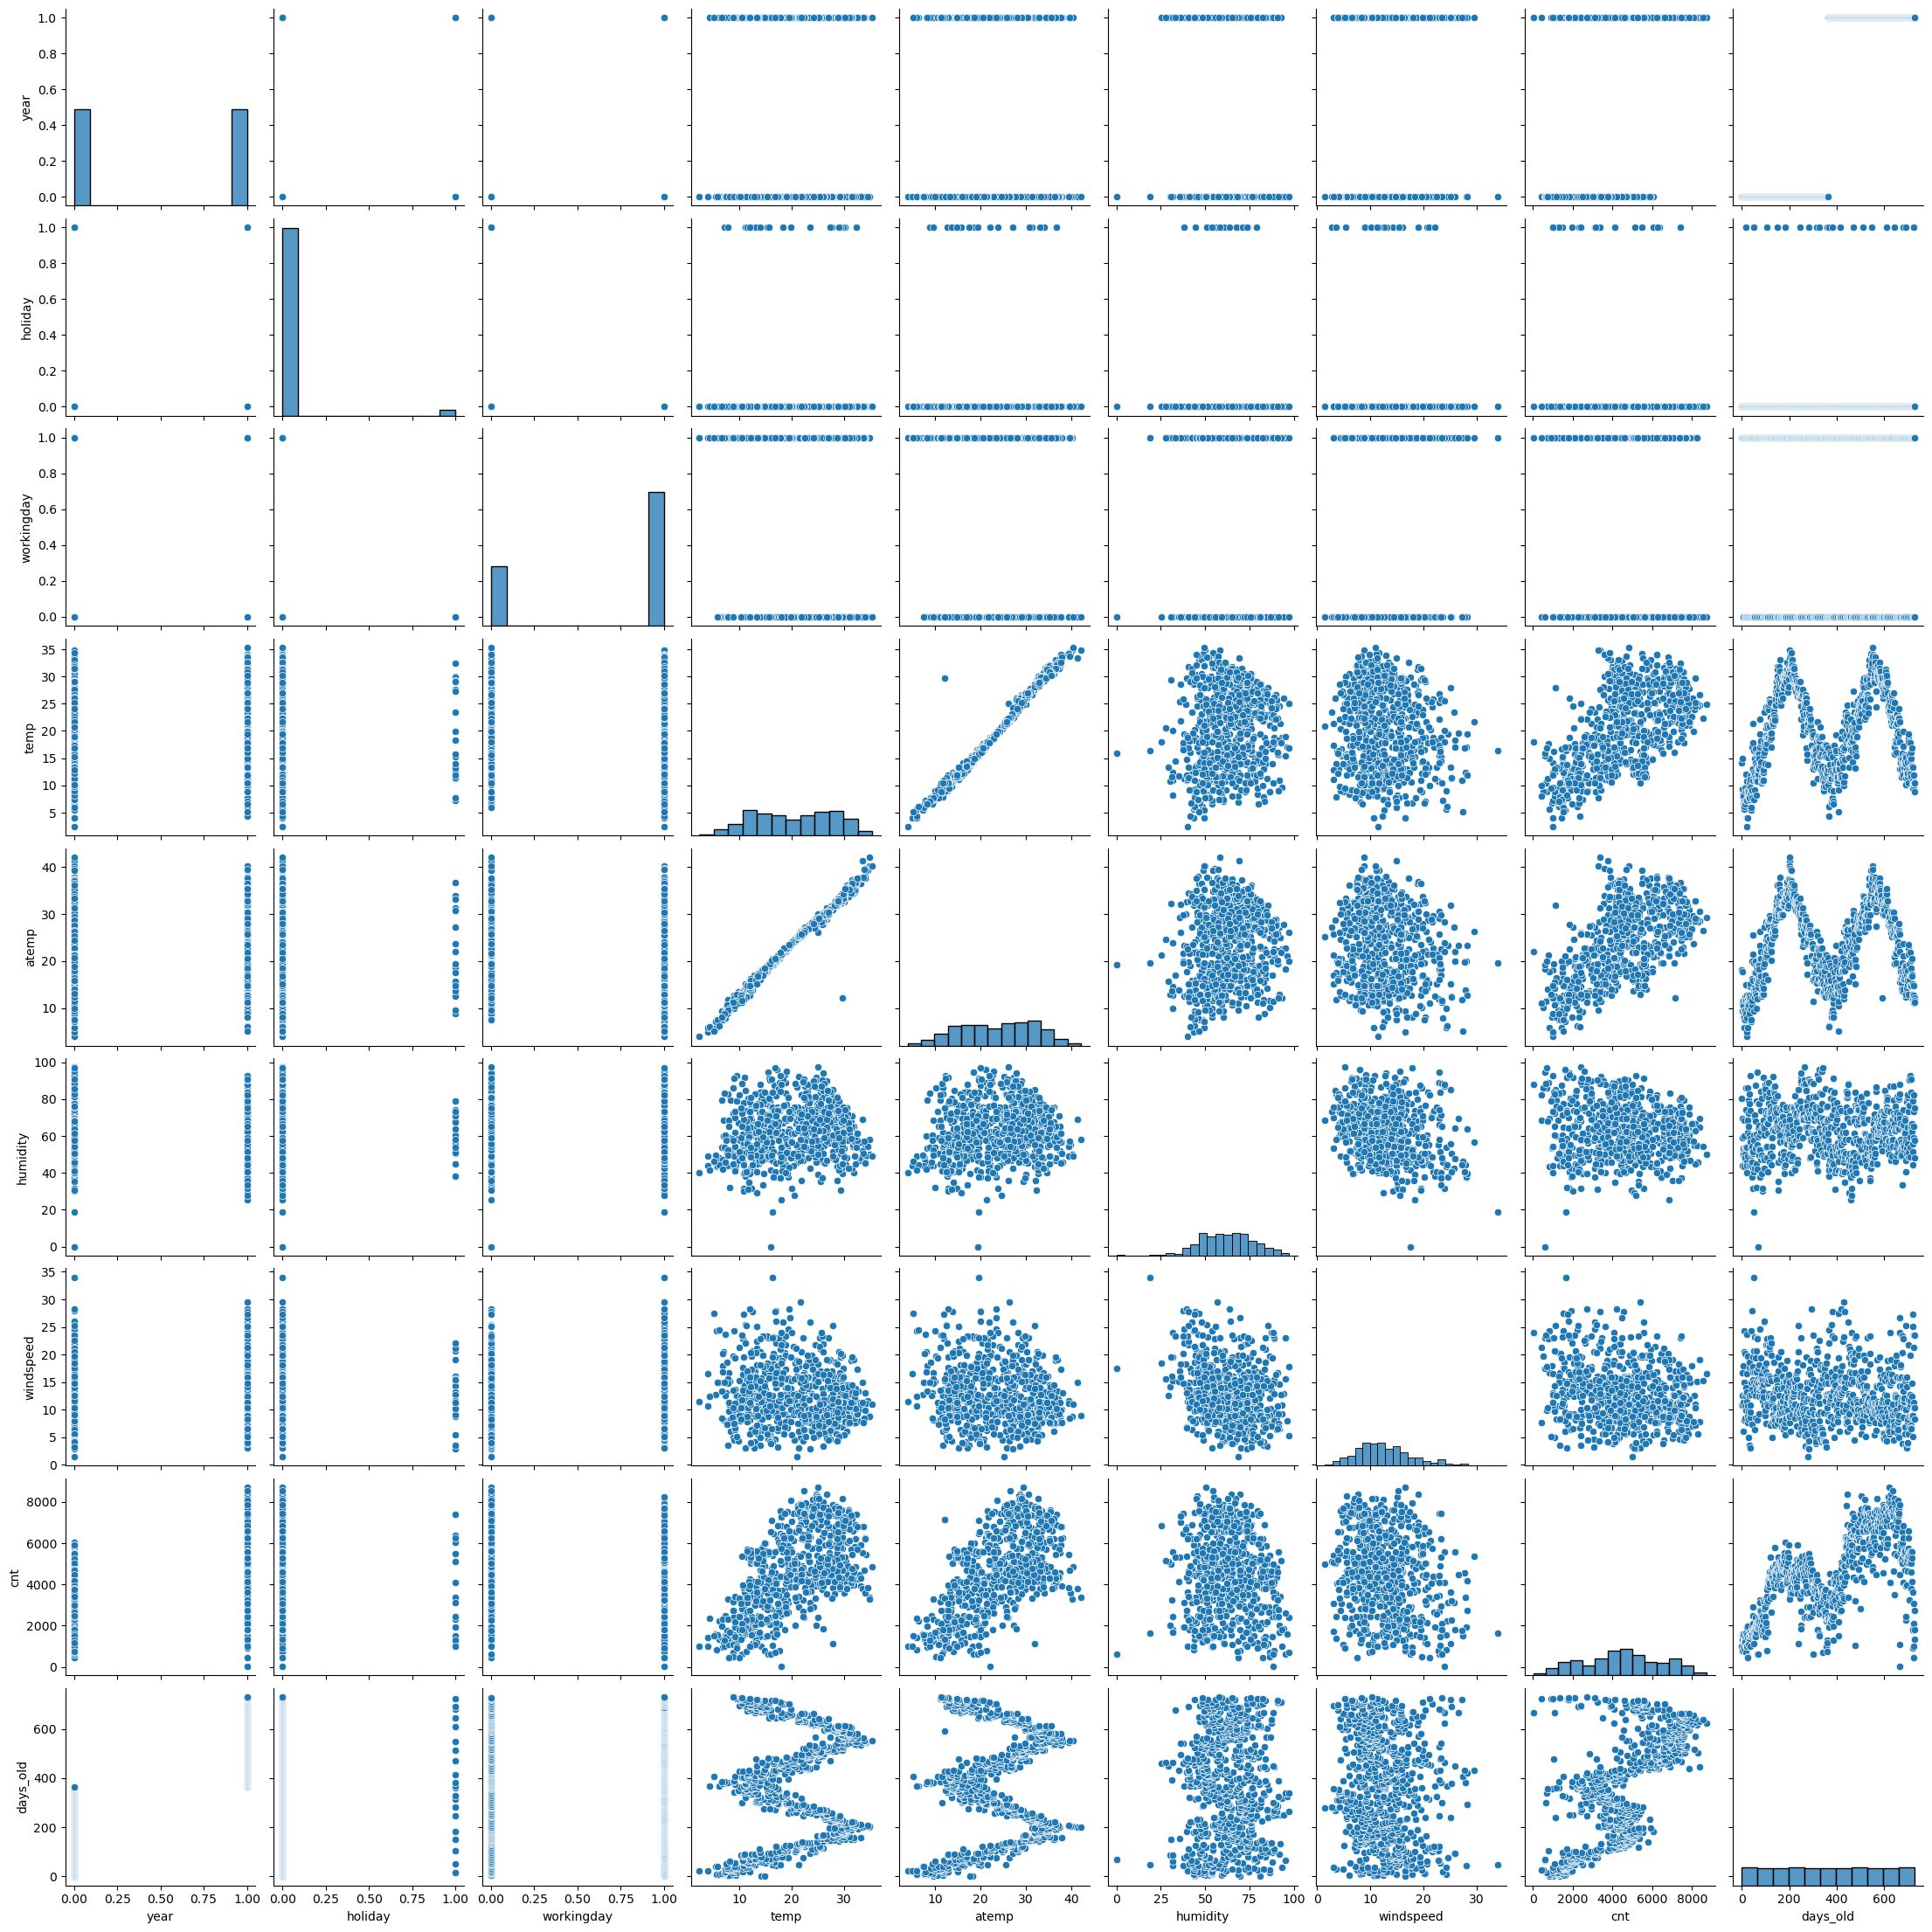

In [29]:
#Visualising the Data to Find the Correlation between the Numerical Variable
plt.figure(figsize=(20,15))
sns.pairplot(df_copy)
plt.show()

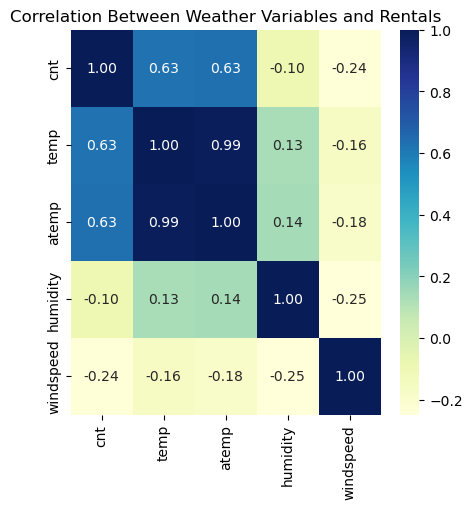

In [30]:
# Correlation heatmap
plt.figure(figsize=(5, 5))
correlation_matrix = df_bike[['cnt', 'temp', 'atemp', 'humidity', 'windspeed']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Correlation Between Weather Variables and Rentals")
plt.show()

<div class="alert alert-block" style="background-color: #f0f4f8; color: #333; border: none; border-radius: 10px; padding: 15px; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.1);">
    <span style='font-family: "Open Sans", sans-serif; font-size: 16px;'>
        <b style="color: #1976d2;">Insight: </b><br>we see that temp and atemp has correlation more than .99 means almost 1 (highly correlated) and atemp seems to be derived from temp so atemp field can be dropped here only </span>    
</div>

<function matplotlib.pyplot.show(close=None, block=None)>

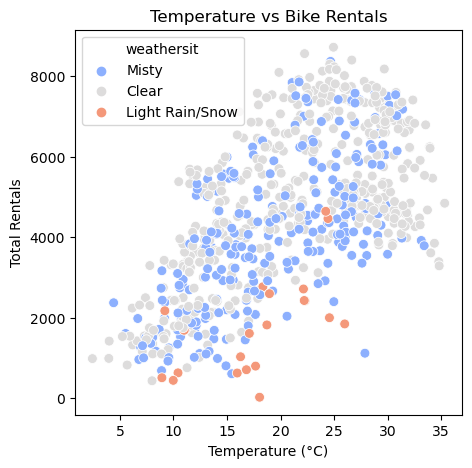

In [31]:
plt.figure(figsize=(5, 5))
sns.scatterplot(data=df_bike, x='temp', y='cnt', hue='weathersit', palette='coolwarm', s=50)
plt.title("Temperature vs Bike Rentals")
plt.xlabel("Temperature (°C)")
plt.ylabel("Total Rentals")
plt.show

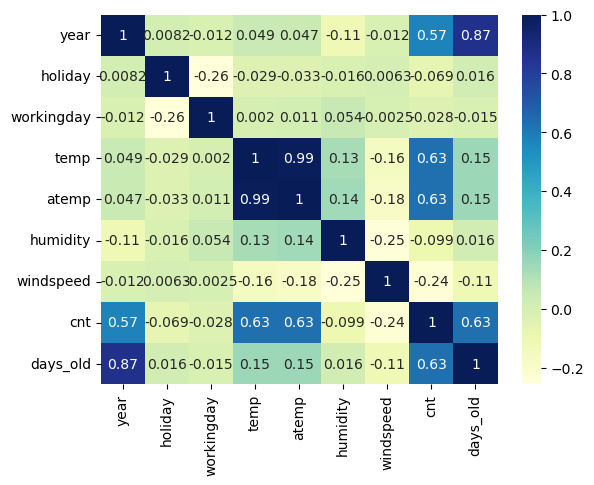

In [32]:
#Correlations for numeric variables
cor=df_bike.corr()
sns.heatmap(cor, cmap="YlGnBu", annot = True)
plt.show()

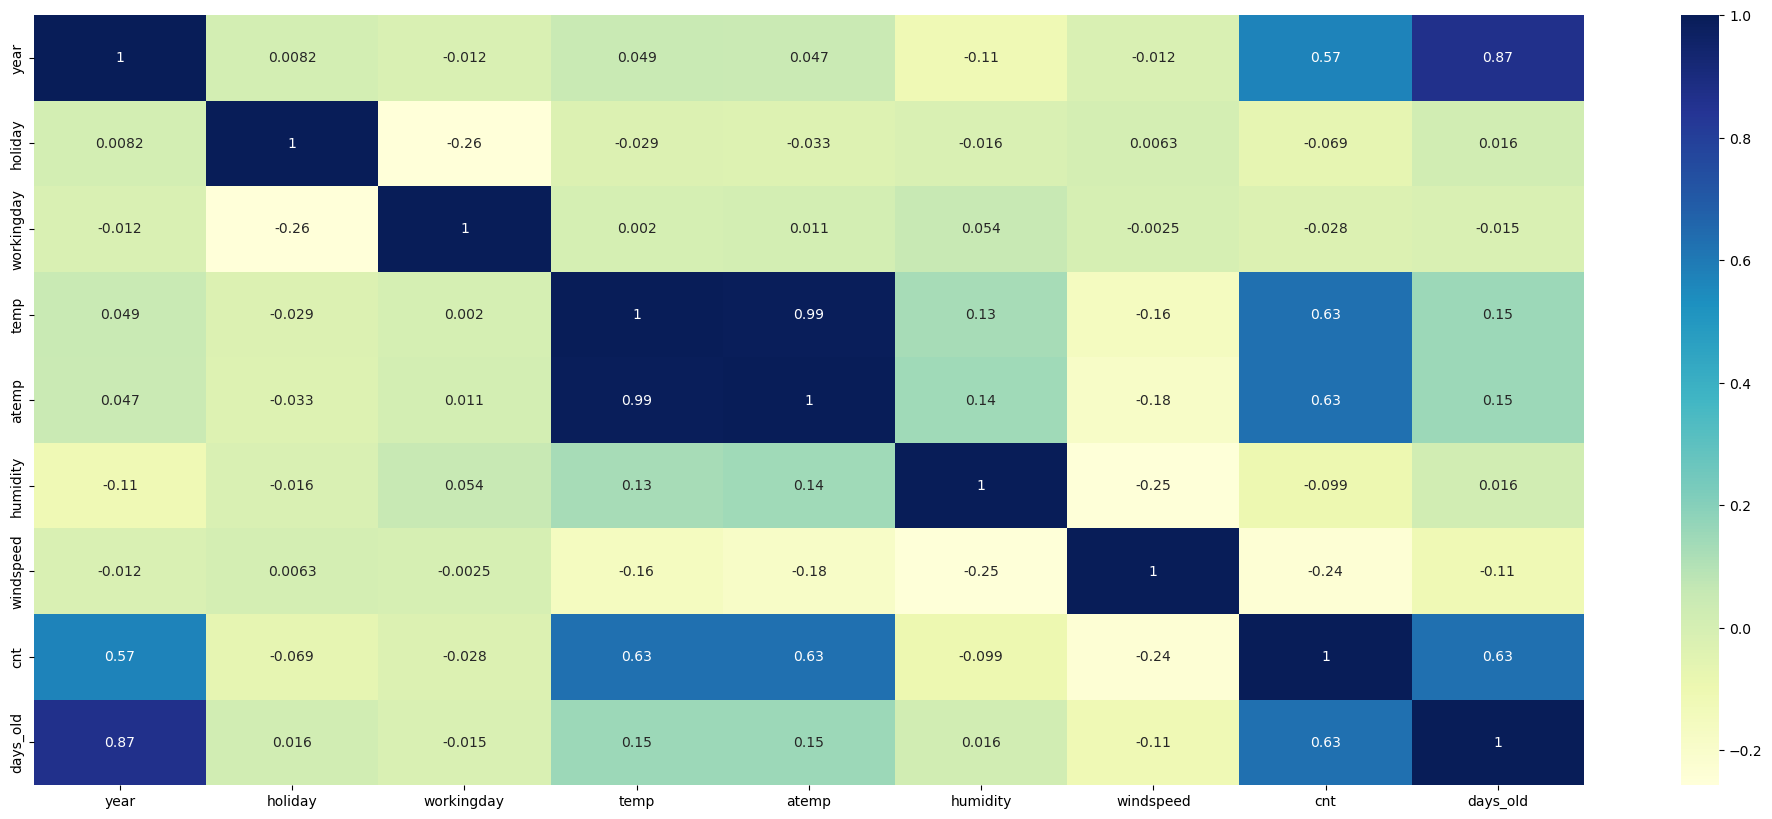

In [33]:
#Calculate Correlation
corr = df_bike.corr()
plt.figure(figsize=(25,10))

#Draw Heatmap of correlation
sns.heatmap(corr,annot=True, cmap='YlGnBu' )
plt.show()

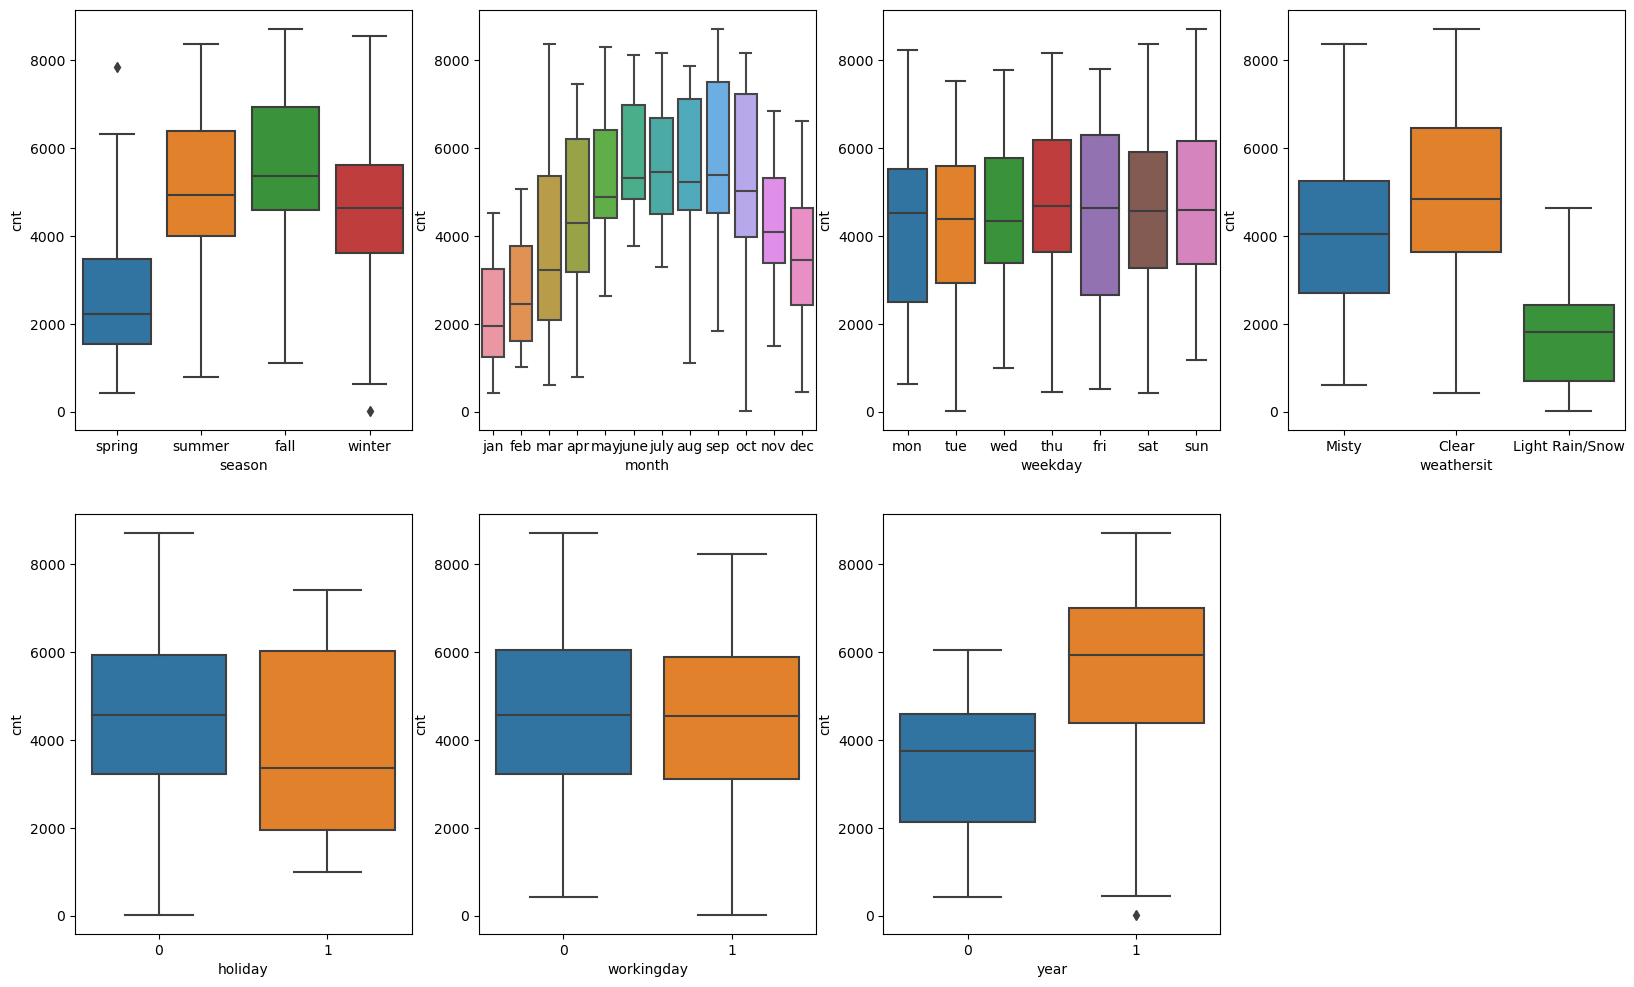

In [34]:
# Analysing/visualizing the categorical columns
# to see how predictor variable stands against the target variable
# season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
plt.figure(figsize=(20,12))
plt.subplot(2,4,1)
sns.boxplot(x='season',y='cnt',data=df_bike)
plt.subplot(2,4,2)
sns.boxplot(x= 'month', y='cnt',data=df_bike)
plt.subplot(2,4,3)
sns.boxplot(x='weekday',y='cnt',data=df_bike)
plt.subplot(2,4,4)
sns.boxplot(x='weathersit',y='cnt',data=df_bike)
plt.subplot(2,4,5)
sns.boxplot(x='holiday',y='cnt',data=df_bike)
plt.subplot(2,4,6)
sns.boxplot(x='workingday',y='cnt',data=df_bike)
plt.subplot(2,4,7)
sns.boxplot(x='year',y='cnt',data=df_bike)
plt.show()

<div class="alert alert-block" style="background-color: #f0f4f8; color: #333; border: none; border-radius: 10px; padding: 15px; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.1);">
    <span style='font-family: "Open Sans", sans-serif; font-size: 16px;'>
        <b style="color: #1976d2;">Insights:</b><br>
        1. Season 3 (Fall) has the highest demand for rental bikes.<br>
        2. Demand for the next year shows noticeable growth.<br>
        3. Bike rentals steadily increase each month until June, with the highest demand in September. After September, demand declines.<br>
        4. Holidays are associated with a drop in bike demand.<br>
        5. Weekdays do not provide a clear pattern for bike demand.<br>
        6. Clear weather conditions have the highest bike rental demand.<br>
        7. Bike-sharing peaks in September, while demand is lowest during year-end and early-year months, likely due to extreme weather conditions.
    </span>    
</div>


In [35]:
# function to create barplot related to categorical columns

def plot_cat_columns(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(x=column,y='cnt',data=df_bike)
    plt.subplot(1,2,2)
    sns.barplot(x=column,y='cnt',data=df_bike, hue='year',palette='Set1')
    plt.legend(labels=['2018','2019'])
    plt.show()

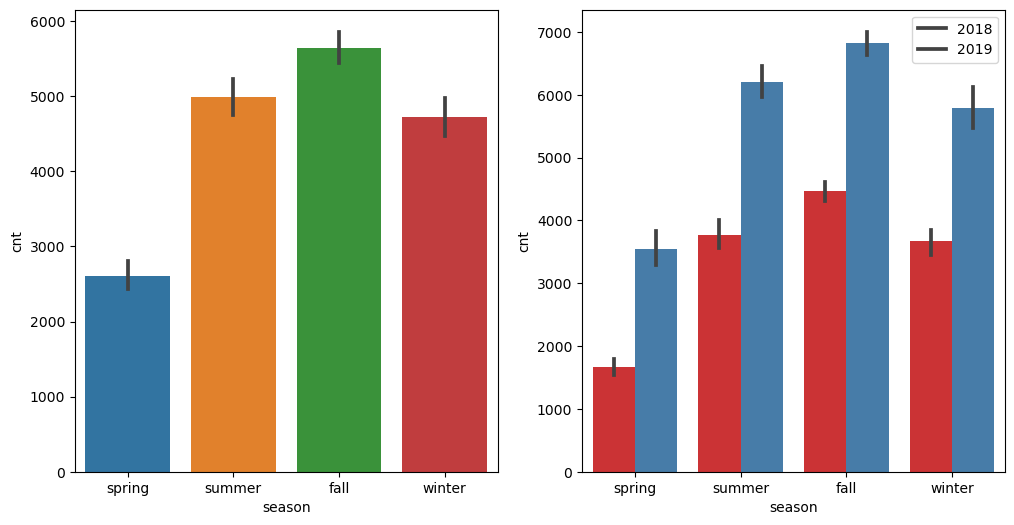

In [36]:
# plotting visualization for season column

plot_cat_columns('season')

Fall season seems to have attracted more booking. And, in each season the booking count has increased drastically from 2018 to 2019.

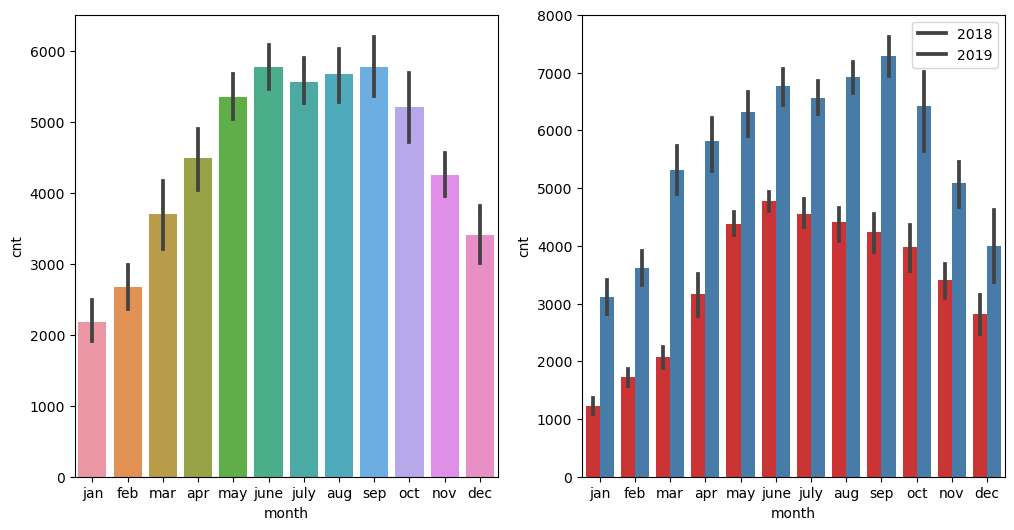

In [37]:
# plotting vis. for month column

plot_cat_columns('month')

Most of the bookings has been done during the month of may, june, july, aug, sep and oct.Trend increased starting of the year tillmid of the year and then it started decreasing as we approached the end of year. Number of booking for each month seems to have increased from 2018 to 2019.

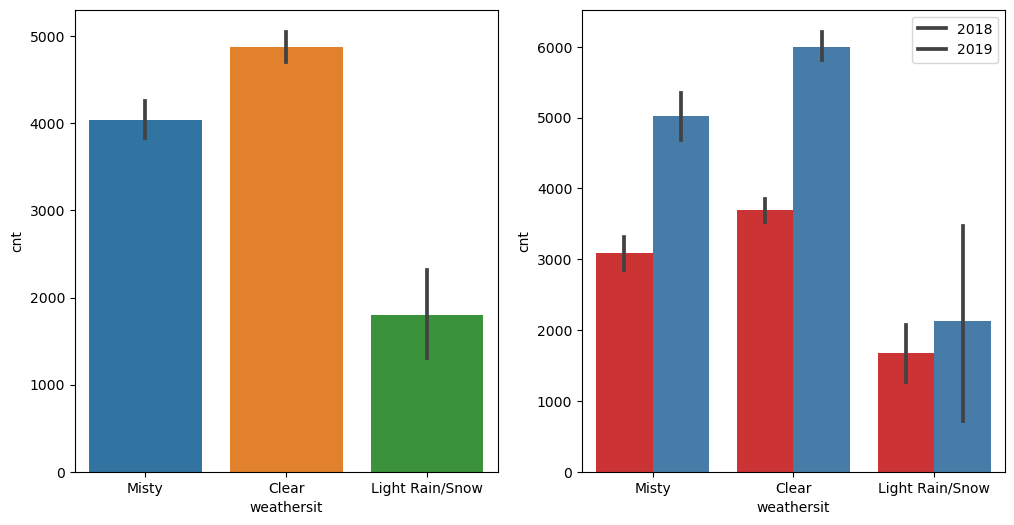

In [38]:
# plotting visualization for weathersit column

plot_cat_columns('weathersit')

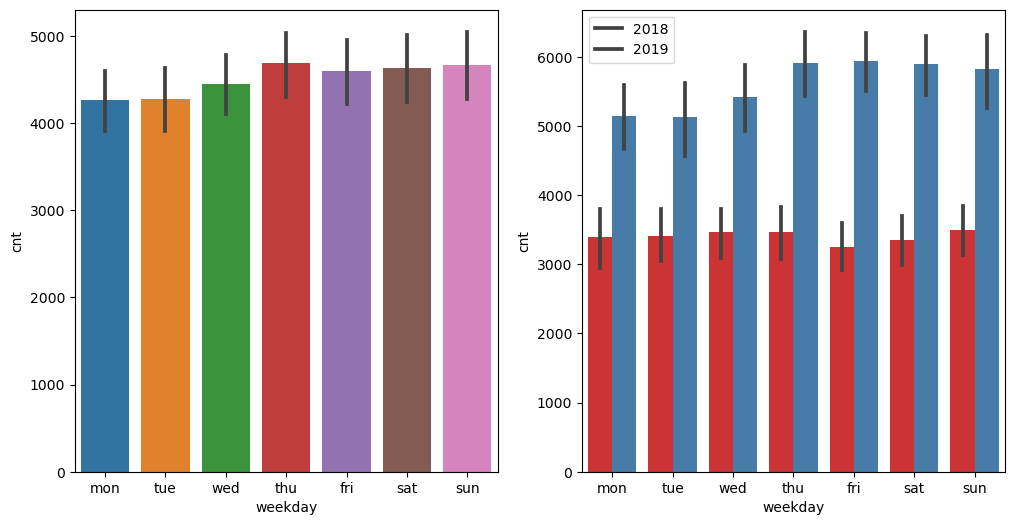

In [39]:
# plotting visualization for weekday column

plot_cat_columns('weekday')

When its not holiday, booking seems to be less in number which seems reasonable as on holidays, people may want to spend time at home and enjoy with family.

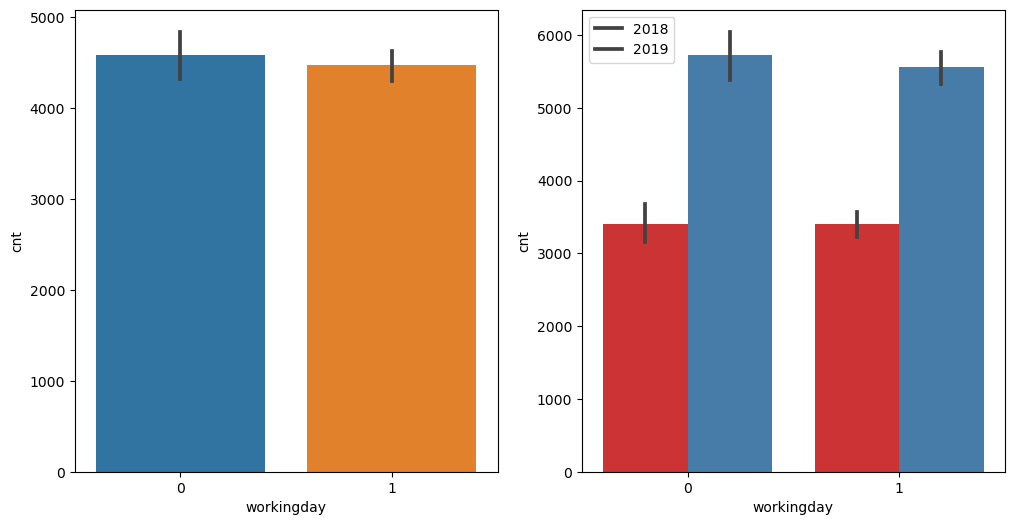

In [40]:
# plotting visualization for workingday column

plot_cat_columns('workingday')

Booking seemed to be almost equal either on working day or non-working day. But, the count increased from 2018 to 2019.

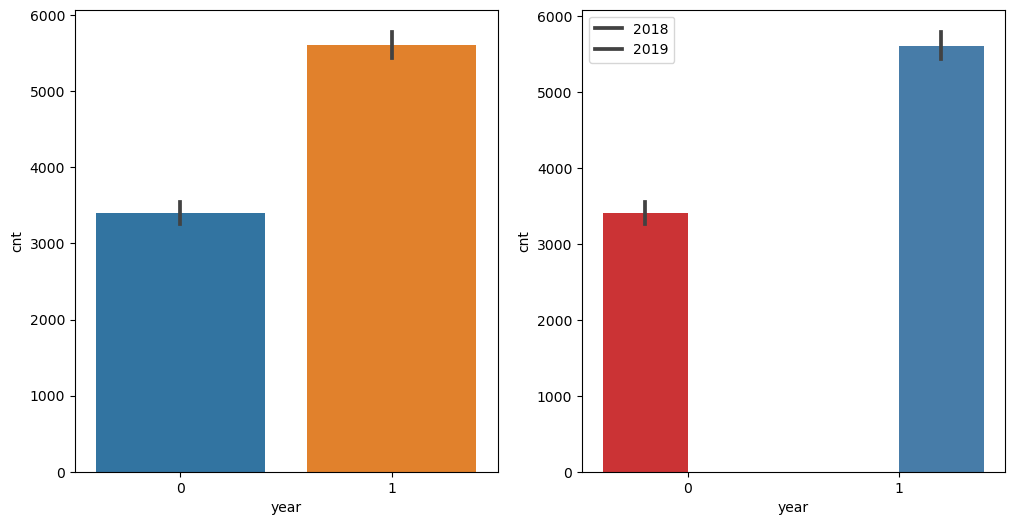

In [41]:
# plotting visualization for year column

plot_cat_columns('year')

2019 attracted more number of booking from the previous year, which shows good progress in terms of business.

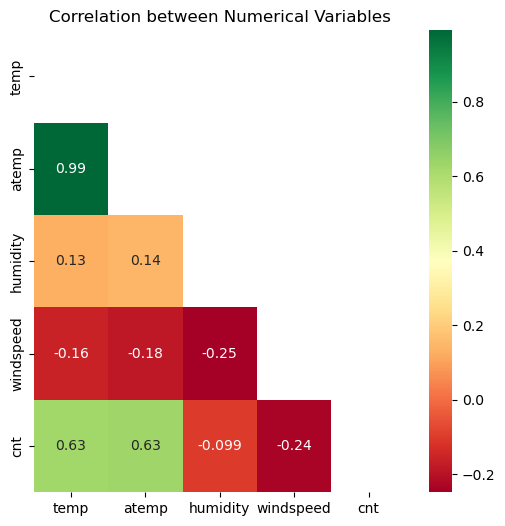

In [42]:
plt.figure(figsize = (6,6))
matrix = np.triu(df_bike[['temp','atemp','humidity','windspeed','cnt']].corr())
sns.heatmap(df_bike[['temp','atemp','humidity','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

<div class="alert alert-block" style="background-color: #f0f4f8; color: #333; border: none; border-radius: 10px; padding: 15px; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.1);">
    <span style='font-family: "Open Sans", sans-serif; font-size: 16px;'>
        <b style="color: #1976d2;">Insight:</b><br>
        There is a linear relationship between `temp` and `atemp`. Including both parameters in the model could lead to multicollinearity issues. The decision on which parameter to retain will be based on the VIF and p-value in relation to other variables.
    </span>    
</div>


In [43]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  days_old    730 non-null    int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 79.8+ KB


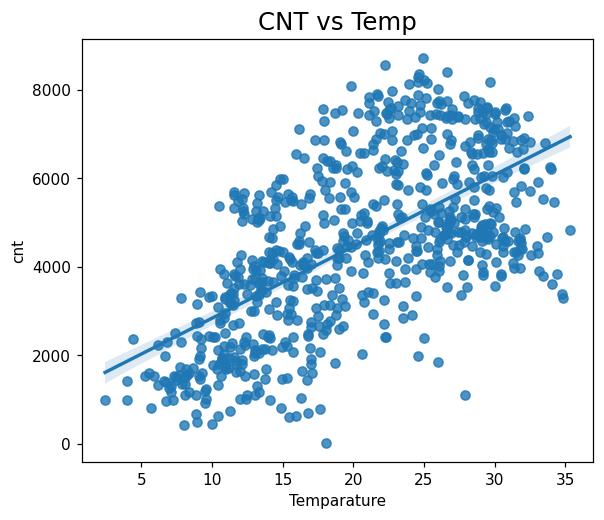

In [44]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("CNT vs Temp",fontsize=16)
sns.regplot(data=df_bike,y="cnt",x="temp")
plt.xlabel("Temparature")
plt.show()

<div class="alert alert-block" style="background-color: #f0f4f8; color: #333; border: none; border-radius: 10px; padding: 15px; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.1);">
    <span style='font-family: "Open Sans", sans-serif; font-size: 16px;'>
        <b style="color: #1976d2;">Insight:</b><br>
        Bike demand shows a positive correlation with temperature. The `cnt` variable demonstrates a linear upward trend as temperature rises, indicating a direct relationship.
    </span>    
</div>


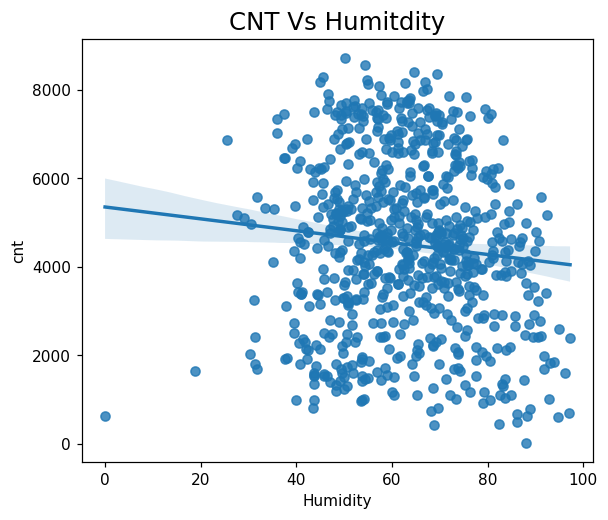

In [45]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("CNT Vs Humitdity",fontsize=16)
sns.regplot(data=df_bike,y="cnt",x="humidity")
plt.xlabel("Humidity")
plt.show()

<div class="alert alert-block" style="background-color: #f0f4f8; color: #333; border: none; border-radius: 10px; padding: 15px; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.1);">
    <span style='font-family: "Open Sans", sans-serif; font-size: 16px;'>
        <b style="color: #1976d2;">Insight:</b><br>
        Humidity values appear to be widely dispersed. However, there is a noticeable decline in `cnt` as humidity increases.
    </span>    
</div>


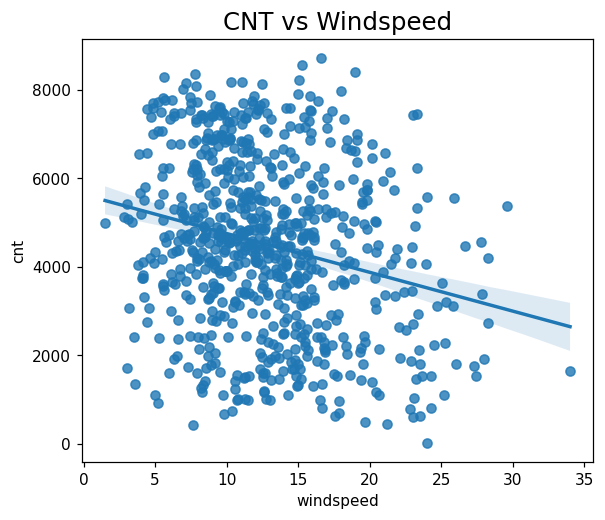

In [46]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("CNT vs Windspeed",fontsize=16)
sns.regplot(data=df_bike,y="cnt",x="windspeed")
plt.show()

<div class="alert alert-block" style="background-color: #f0f4f8; color: #333; border: none; border-radius: 10px; padding: 15px; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.1);">
    <span style='font-family: "Open Sans", sans-serif; font-size: 16px;'>
        <b style="color: #1976d2;">Insight:</b><br>
        Windspeed values show a significant degree of dispersion. Despite this, there is a clear decline in `cnt` as windspeed increases.
    </span>    
</div>


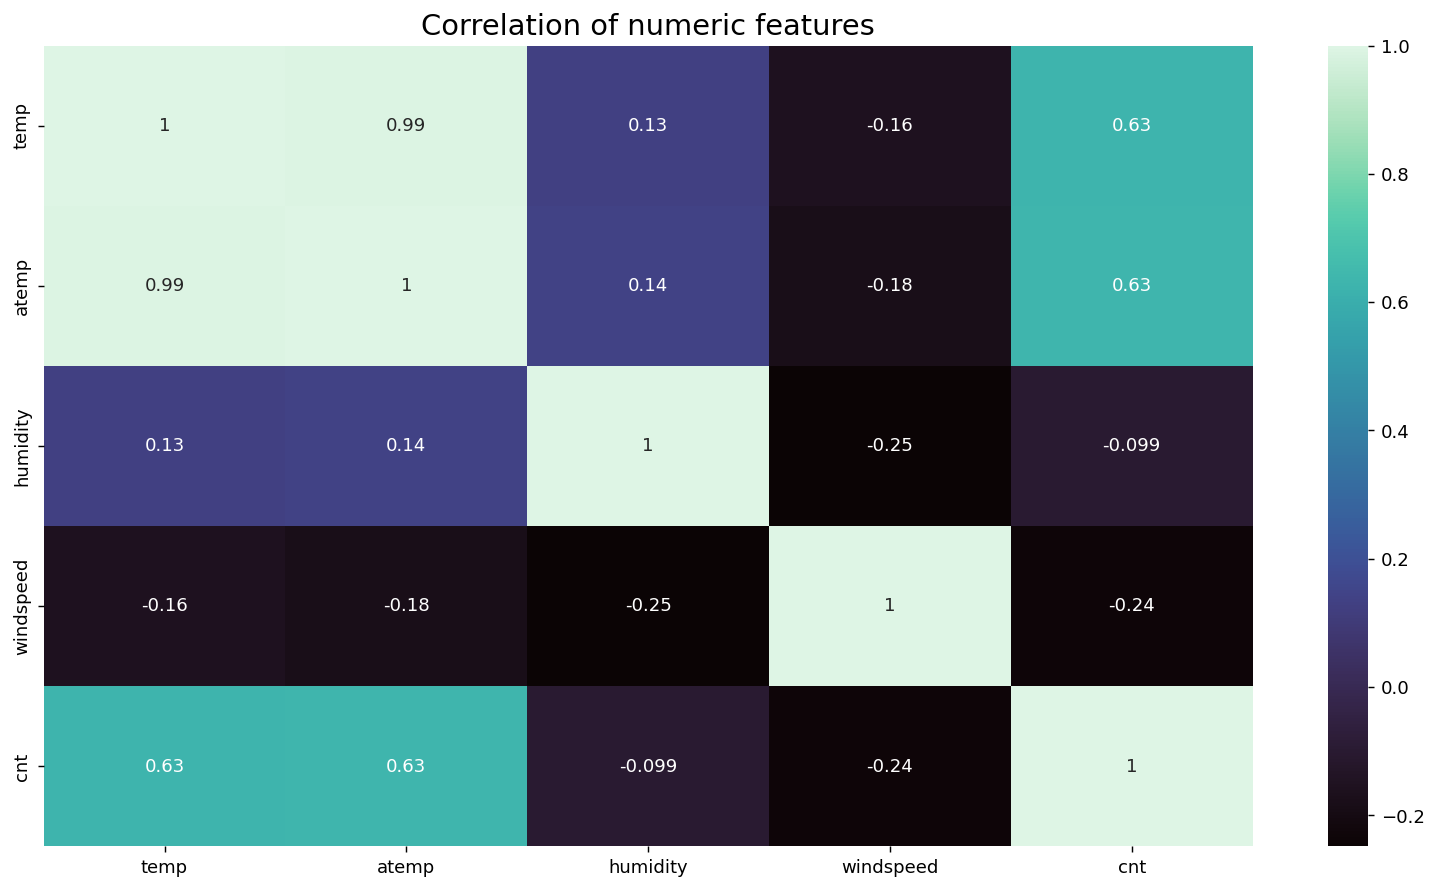

In [47]:
num_features = ["temp","atemp","humidity","windspeed","cnt"]
plt.figure(figsize=(15,8),dpi=130)
plt.title("Correlation of numeric features",fontsize=16)
sns.heatmap(df_bike[num_features].corr(),annot=True,cmap="mako")
plt.show()

<div class="alert alert-block" style="background-color: #f0f4f8; color: #333; border: none; border-radius: 10px; padding: 15px; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.1);">
    <span style='font-family: "Open Sans", sans-serif; font-size: 16px;'>
        <b style="color: #1976d2;">Insight:</b><br>
        Temp and Atemp have a strong mutual correlation. While we may consider removing one to address redundancy, both will be retained for deeper analysis. Additionally, both variables show a notable positive correlation with the target variable, `cnt`.
    </span>    
</div>


In [48]:
df_bike.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,days_old
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849,364.500000
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647,210.877136
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,182.250000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,364.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,546.750000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,729.000000


## 5. Data Preparation for Linear Regression
#### Create dummy variables for all categorical variables

In [49]:
df_bike = pd.get_dummies(data=df_bike,columns=["season","month","weekday"],drop_first=True)
df_bike = pd.get_dummies(data=df_bike,columns=["weathersit"])

<div class="alert alert-block" style="background-color: #f0f4f8; color: #333; border: none; border-radius: 10px; padding: 15px; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.1);">
    <span style='font-family: "Open Sans", sans-serif; font-size: 16px;'>
        <b style="color: #1976d2;">Insight:</b><br>
        <ul>
            <li>Dropping the first columns as (p-1) dummies can explain p categories.</li>
           <li>In weathersit first column was not dropped so as to not lose the info about severe weather situation.</li> 
        </ul>
    </span>    
</div>


In [50]:
df_bike.columns

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'cnt', 'days_old', 'season_spring', 'season_summer',
       'season_winter', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_july', 'month_june', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed', 'weathersit_Clear',
       'weathersit_Light Rain/Snow', 'weathersit_Misty'],
      dtype='object')

In [51]:
#Print few rows to inspect
df_bike.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,days_old,season_spring,...,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Clear,weathersit_Light Rain/Snow,weathersit_Misty
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,1,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,...,0,0,0,0,0,0,1,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,...,0,0,0,0,1,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,...,0,0,0,0,0,0,0,1,0,0


# 6. Model Building
#### Split Data into training and test

In [52]:
# Checking shape before splitting
df_bike.shape

(730, 32)

In [53]:


#y to contain only target variable
y= df_bike.pop('cnt')

#X is all remaining variable , also our independent variables
x=df_bike

#Train Test split with 70:30 ratio
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [54]:
x.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,days_old,season_spring,season_summer,...,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Clear,weathersit_Light Rain/Snow,weathersit_Misty
0,0,0,1,14.110847,18.18125,80.5833,10.749882,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,1,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,2,1,0,...,0,0,0,0,0,0,1,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,3,1,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,4,1,0,...,0,0,0,0,0,0,0,1,0,0


In [55]:
# Checking shape and size for train and test
print(x_train.shape)
print(x_test.shape)

(511, 31)
(219, 31)


## Feature Scaling continuous variables

#### Importing required library
To make all features in same scale to know easily.
following columns are continous to be scale
temp,humidity,windspeed.


In [56]:
# Let us scale continuous variables
num_vars = ['temp','atemp','humidity','windspeed','days_old']

# Use Normalized scaler to scale
scaler = MinMaxScaler()

In [57]:
#Fit and transform training set only
x_train[num_vars] = scaler.fit_transform(x_train[num_vars])

In [58]:
#Inspect stats fro Training set after scaling
x_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,days_old,season_spring,season_summer,...,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Clear,weathersit_Light Rain/Snow,weathersit_Misty
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.698630,0.550874,0.526518,0.654174,0.414873,0.512409,0.230920,0.258317,...,0.09002,0.148728,0.142857,0.133072,0.135029,0.156556,0.133072,0.624266,0.029354,0.346380
std,0.500067,0.163398,0.459303,0.227231,0.212976,0.143648,0.185619,0.292268,0.421834,0.438138,...,0.28649,0.356169,0.350270,0.339986,0.342090,0.363738,0.339986,0.484786,0.168963,0.476282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.353207,0.544598,0.281934,0.254458,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575304,0.563297,0.659940,0.384732,0.521262,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745079,0.698389,0.756977,0.526481,0.770233,0.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
x_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,days_old,season_spring,season_summer,...,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Clear,weathersit_Light Rain/Snow,weathersit_Misty
683,1,0,1,0.327133,0.322150,0.639330,0.327101,0.936900,0,0,...,0,0,0,0,0,0,0,0,0,1
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0.884774,0,0,...,0,0,0,0,0,1,0,0,0,1
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0.223594,0,1,...,0,0,0,0,0,0,1,1,0,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,0.493827,1,0,...,0,0,0,0,1,0,0,0,0,1
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0.877915,0,0,...,0,0,0,0,1,0,0,0,0,1


## Build a Model using RFE and Automated approach

#### for that i am using RFE to eliminate some columns 

In [60]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [61]:
#Cut down number of features to 15 using automated approach

rfe = RFE(estimator=lr, n_features_to_select=15)
rfe.fit(x_train, y_train)


RFE(estimator=LinearRegression(), n_features_to_select=15)

In [62]:
#Columns selected by RFE and their weights
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 15),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('days_old', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 12),
 ('season_winter', True, 1),
 ('month_aug', False, 4),
 ('month_dec', False, 2),
 ('month_feb', False, 11),
 ('month_jan', False, 7),
 ('month_july', False, 14),
 ('month_june', False, 5),
 ('month_mar', True, 1),
 ('month_may', True, 1),
 ('month_nov', False, 3),
 ('month_oct', True, 1),
 ('month_sep', True, 1),
 ('weekday_mon', False, 8),
 ('weekday_sat', False, 16),
 ('weekday_sun', False, 13),
 ('weekday_thu', False, 17),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 9),
 ('weathersit_Clear', True, 1),
 ('weathersit_Light Rain/Snow', True, 1),
 ('weathersit_Misty', False, 6)]

## Manual Elimination



### Function to build a model using statsmodel api

In [63]:
# Now creating function to build a model using statsmodel api -Takes the columns to be selected for model as parameter

def build_model(cols):
    x_train_sm = sm.add_constant(x_train[cols])
    lm = sm.OLS(y_train,x_train_sm).fit()
    print(lm.summary())
    return lm

### Function to calculate VIFs and print them

In [64]:
# Function to calculate VIFs and print them -Takes the columns for which VIF To be calculated as a parameter

def get_vif(cols):
    df1 = x_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [65]:
x_train.columns[rfe.support_]

Index(['year', 'holiday', 'temp', 'atemp', 'humidity', 'windspeed', 'days_old',
       'season_spring', 'season_winter', 'month_mar', 'month_may', 'month_oct',
       'month_sep', 'weathersit_Clear', 'weathersit_Light Rain/Snow'],
      dtype='object')

In [66]:
x_train.columns[~rfe.support_]

Index(['workingday', 'season_summer', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_july', 'month_june', 'month_nov', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_Misty'],
      dtype='object')

In [67]:
x_train_rfe = x_train[['year','holiday','workingday','temp','humidity','windspeed','season_spring',
                      'season_summer','season_winter','month_jan','month_july','month_sep','weekday_sat',
                      'weathersit_Light Rain/Snow','weathersit_Misty']]

In [68]:
x_train_rfe.shape

(511, 15)

# 6. Build Model
## Model 1 - Start using all columns selected by RFE

In [69]:
# Selected columns for model 1 - all columns selected by RFE
cols = ['year','holiday','workingday','temp','humidity','windspeed','season_spring',
       'season_summer','season_winter','month_jan','month_july','month_sep','weekday_sat','weathersit_Light Rain/Snow','weathersit_Misty']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     165.0
Date:                Mon, 30 Dec 2024   Prob (F-statistic):          1.70e-181
Time:                        17:13:58   Log-Likelihood:                -4134.9
No. Observations:                 511   AIC:                             8302.
Df Residuals:                     495   BIC:                             8370.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

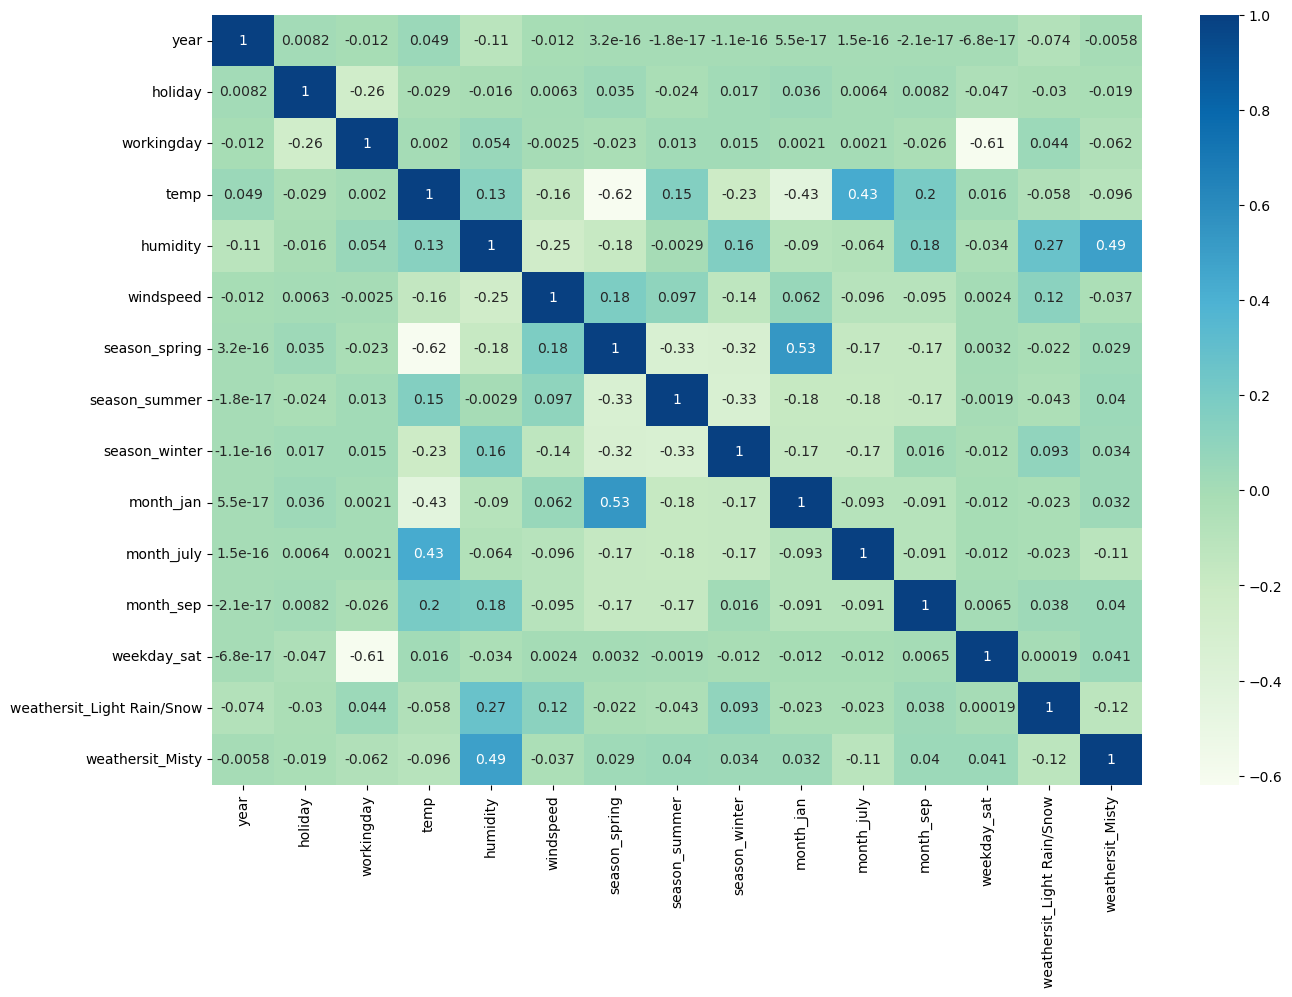

In [70]:
# checking correlation of features selected by RFE with target column,
# Also to check impact of different features on target.

plt.figure(figsize = (15,10))
sns.heatmap(df_bike[['year','holiday','workingday','temp','humidity','windspeed','season_spring',
                    'season_summer','season_winter','month_jan','month_july','month_sep','weekday_sat',
                    'weathersit_Light Rain/Snow','weathersit_Misty']].corr(),cmap="GnBu",annot=True)
plt.show()

# Model 2

In [71]:
# Dropping the variable month_jan as it has negative coefficient and is insignificant as it has high p-value
cols = ['year','holiday','workingday','temp','humidity','windspeed',
        'season_spring','season_summer','season_winter',
        'month_july','month_sep','weekday_sat',
        'weathersit_Light Rain/Snow','weathersit_Misty']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     177.1
Date:                Mon, 30 Dec 2024   Prob (F-statistic):          1.35e-182
Time:                        17:13:59   Log-Likelihood:                -4135.0
No. Observations:                 511   AIC:                             8300.
Df Residuals:                     496   BIC:                             8363.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

# Model 3
All columns had p-value > .05 , thinking about checking VIFs, i am thinking about dropping variable 'humidity' because it has negative coefficient and it's insignificant as it has high p-value.

In [72]:
cols = ['year','holiday','workingday','temp','windspeed','season_spring',
       'season_summer','season_winter','month_july','month_sep','weekday_sat',
       'weathersit_Light Rain/Snow','weathersit_Misty']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     183.6
Date:                Mon, 30 Dec 2024   Prob (F-statistic):          3.37e-180
Time:                        17:13:59   Log-Likelihood:                -4143.4
No. Observations:                 511   AIC:                             8315.
Df Residuals:                     497   BIC:                             8374.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

# Module 4
i will drop holiday as it is having negative coefficient and is insignificant as it has high p-value

In [73]:
cols = ['year','workingday','temp','windspeed','season_spring',
       'season_summer','season_winter','month_july','month_sep','weekday_sat',
       'weathersit_Light Rain/Snow','weathersit_Misty']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     193.1
Date:                Mon, 30 Dec 2024   Prob (F-statistic):          1.51e-178
Time:                        17:13:59   Log-Likelihood:                -4150.1
No. Observations:                 511   AIC:                             8326.
Df Residuals:                     498   BIC:                             8381.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

# model 5
dropping variable month_july for same above reasons i gave.

In [74]:
cols = ['year','workingday','temp','windspeed','season_spring',
       'season_summer','season_winter','month_sep','weekday_sat',
       'weathersit_Light Rain/Snow','weathersit_Misty']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     209.0
Date:                Mon, 30 Dec 2024   Prob (F-statistic):          8.20e-179
Time:                        17:13:59   Log-Likelihood:                -4152.2
No. Observations:                 511   AIC:                             8328.
Df Residuals:                     499   BIC:                             8379.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

# model 6
i am dropping this column "temp" because it also has negative coefficient and is insignficant as it has high p-value.

In [75]:
cols = ['year','workingday','windspeed','season_spring',
       'season_summer','season_winter','month_sep','weekday_sat',
       'weathersit_Light Rain/Snow','weathersit_Misty']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     156.8
Date:                Mon, 30 Dec 2024   Prob (F-statistic):          4.14e-147
Time:                        17:13:59   Log-Likelihood:                -4229.9
No. Observations:                 511   AIC:                             8482.
Df Residuals:                     500   BIC:                             8528.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

# Model 7
trying to replace july with spring as both were highly correlated


In [76]:
cols = ['year','workingday','windspeed','month_july',
       'season_summer','season_winter','month_sep','weekday_sat',
       'weathersit_Light Rain/Snow','weathersit_Misty']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     74.53
Date:                Mon, 30 Dec 2024   Prob (F-statistic):           1.84e-92
Time:                        17:13:59   Log-Likelihood:                -4359.5
No. Observations:                 511   AIC:                             8741.
Df Residuals:                     500   BIC:                             8788.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

# Model 8 
I am gonna try replacing july with spring as both were highly correlated.


In [77]:
cols = ['year', 'workingday', 'windspeed', 'month_july',
       'season_summer', 'season_winter', 'month_sep', 'weekday_sat',
       'weathersit_Light Rain/Snow', 'weathersit_Misty']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     74.53
Date:                Mon, 30 Dec 2024   Prob (F-statistic):           1.84e-92
Time:                        17:13:59   Log-Likelihood:                -4359.5
No. Observations:                 511   AIC:                             8741.
Df Residuals:                     500   BIC:                             8788.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

# Model 9
Removing windspeed with spring as windspeed was highly correlated with temp

In [78]:
cols= ['year', 'workingday', 'season_spring', 'month_july',
       'season_summer', 'season_winter', 'month_sep', 'weekday_sat',
       'weathersit_Light Rain/Snow', 'weathersit_Misty']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     148.1
Date:                Mon, 30 Dec 2024   Prob (F-statistic):          1.75e-142
Time:                        17:13:59   Log-Likelihood:                -4240.9
No. Observations:                 511   AIC:                             8504.
Df Residuals:                     500   BIC:                             8550.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

# Model 10 
using the weekend "Sunday" which was dropped during RFE INSTEAD OF saturday.

In [79]:
cols = ['year', 'workingday', 'season_spring', 'month_july',
       'season_summer', 'season_winter', 'month_sep', 'weekday_sun',
       'weathersit_Light Rain/Snow', 'weathersit_Misty']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     147.6
Date:                Mon, 30 Dec 2024   Prob (F-statistic):          3.20e-142
Time:                        17:13:59   Log-Likelihood:                -4241.5
No. Observations:                 511   AIC:                             8505.
Df Residuals:                     500   BIC:                             8552.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

# Model 11 
Adding temp and removed 'season_summer' and 'workingday'

In [80]:
cols = ['year','season_spring','month_july',
       'season_winter','month_sep','weekday_sun',
       'weathersit_Light Rain/Snow','weathersit_Misty','temp']
#['year', 'holiday','temp', 'spring','winter', 'July','September','Sunday','Light_Snow/Rain','Misty_Cloudy']
build_model(cols)
get_vif(cols)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     246.5
Date:                Mon, 30 Dec 2024   Prob (F-statistic):          9.73e-178
Time:                        17:13:59   Log-Likelihood:                -4160.4
No. Observations:                 511   AIC:                             8341.
Df Residuals:                     501   BIC:                             8383.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

<div class="alert alert-block" style="background-color: #f0f4f8; color: #333; border: none; border-radius: 10px; padding: 15px; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.1);">
    <span style='font-family: "Open Sans", sans-serif; font-size: 16px;'>
        <b style="color: #1976d2;">Insight:</b><br>
        <ul>
        <li>The VIF values for the model are within acceptable limits, confirming no multicollinearity issues.</li>  
        <li>P-values for all features are nearly 0.0, indicating their significance in the model.</li>  
        <li>R-squared and Adjusted R-squared values are both high, showing the model's strong explanatory power.</li>  
        <li>The minimal difference between R-squared and Adjusted R-squared suggests no unnecessary variables in the model.</li>  
        <li>Model 11 stands out as the best choice due to its superior statistics and the absence of insignificant or highly correlated variables.</li>
        </ul>
    </span>    
</div>


In [81]:
# let's build function to build a final model using sklearn with all the columns to select features automatically.
def build_model_sk(x,y):
    lr1 = LinearRegression()
    lr1.fit(x,y)
    return lr1

In [82]:
cols = ['year','season_spring','month_july',
       'season_winter','month_sep','weekday_sun',
       'weathersit_Light Rain/Snow','weathersit_Misty','temp']

# build a model with above 9 columns.
lr=build_model_sk(x_train[cols],y_train)
print(lr.intercept_,lr.coef_)

1740.7372440164268 [ 1994.67955569 -1167.70089558  -514.63181313   496.75430396
   465.92729708   190.37518346 -2256.10482681  -662.38986442
  3984.25555511]


# Model Evaluation
### Residual Analysis

In [83]:
y_train_pred = lr.predict(x_train[cols])

In [84]:
#plot a histogram of the error terms 
def plot_res_dist(act,pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

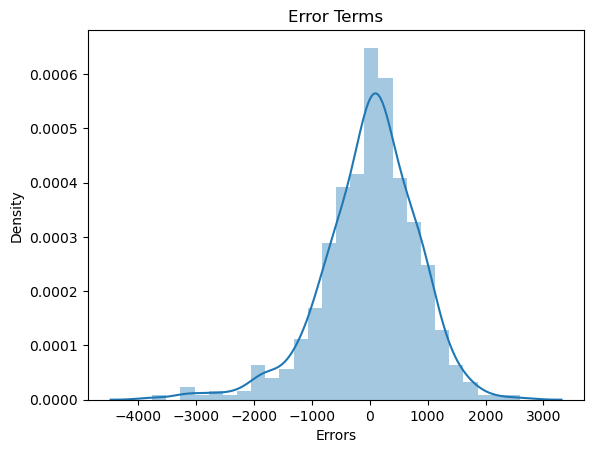

In [85]:
plot_res_dist(y_train,y_train_pred)

Errors are normally distribured here with mean 0. So everything seems to be fine here

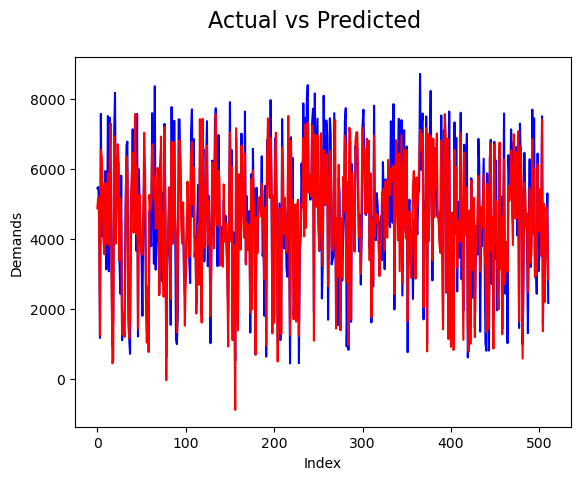

In [86]:
# Actual vs Predicted

c = [i for i in range(0,len(x_train),1)]
plt.plot(c,y_train,color= "blue")
plt.plot(c,y_train_pred,color='red')
plt.suptitle("Actual vs Predicted",fontsize = 16)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

<div class="alert alert-block" style="background-color: #f0f4f8; color: #333; border: none; border-radius: 10px; padding: 15px; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.1);">
    <span style='font-family: "Open Sans", sans-serif; font-size: 16px;'>
        <b style="color: #1976d2;">Insight:</b><br>Actual and Predicted result following almost the same pattern, i guess its perfect
    </span>    
</div>


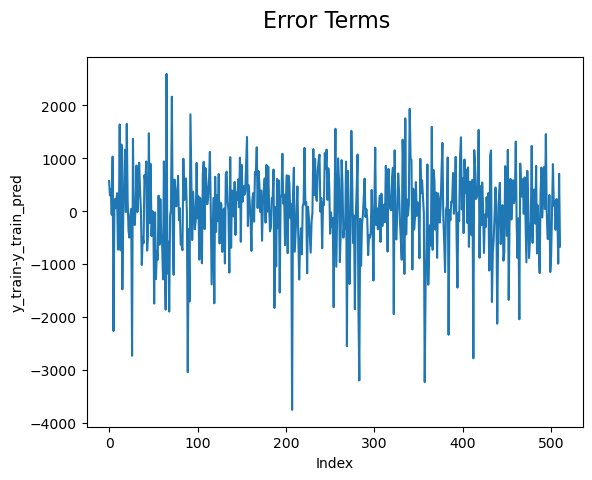

In [87]:
# Error Terms
c = [i for i in range(0,len(x_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 16)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()


<div class="alert alert-block" style="background-color: #f0f4f8; color: #333; border: none; border-radius: 10px; padding: 15px; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.1);">
    <span style='font-family: "Open Sans", sans-serif; font-size: 16px;'>
        <b style="color: #1976d2;">Insight:</b><br>Here,If we see the error terms are independent of each other.
    </span>    
</div>


In [88]:
# let's see what is the R-Square value.
r2_score(y_train,y_train_pred)

0.8158045196281631

<div class="alert alert-block" style="background-color: #f0f4f8; color: #333; border: none; border-radius: 10px; padding: 15px; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.1);">
    <span style='font-family: "Open Sans", sans-serif; font-size: 16px;'>
        <b style="color: #1976d2;">Insight:</b><br>R2 Same as we obtained for our final model
    </span>    
</div>


## Linearity Check

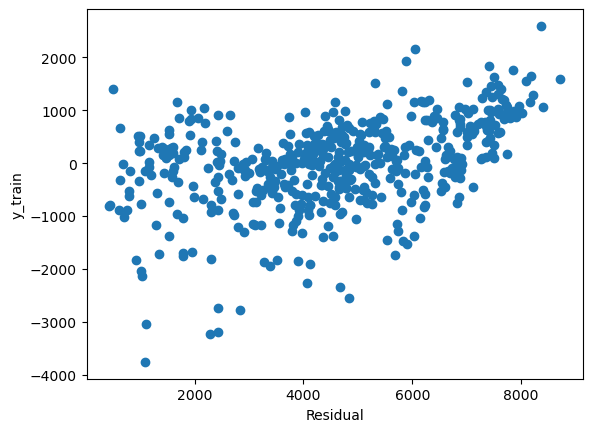

In [89]:

# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

### Predict values for test data set

In [90]:
# scale variables in x_test
num_vars = ['temp','atemp','humidity','windspeed','days_old']
#test data to be transformd only, no fitting
x_test[num_vars] = scaler.transform(x_test[num_vars])

In [91]:
# Columns from out final model
cols = ['year', 'season_spring', 'month_july',
        'season_winter', 'month_sep', 'weekday_sun',
       'weathersit_Light Rain/Snow', 'weathersit_Misty', 'temp']

y_test_pred = lr.predict(x_test[cols])

### R-Squared value for test predictions

In [92]:
# Find out the R squared number between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.8127228702995221

## Homoscedacity

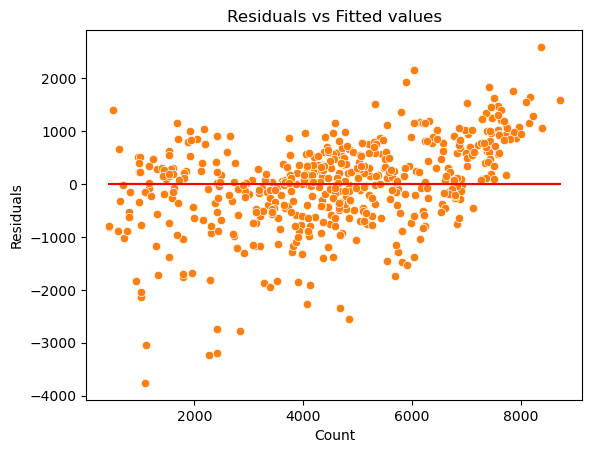

In [94]:
sns.scatterplot(x=y_train, y=residual)

sns.scatterplot(x=y_train, y=residual)
plt.plot(y_train, (y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values')
plt.show()


<div class="alert alert-block" style="background-color: #f0f4f8; color: #333; border: none; border-radius: 10px; padding: 15px; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.1);">
    <span style='font-family: "Open Sans", sans-serif; font-size: 16px;'>
        <b style="color: #1976d2;">Insight:</b><br>No visible pattern observed from above plot for residuals.
    </span>    
</div>

Text(0, 0.5, 'y_test_pred')

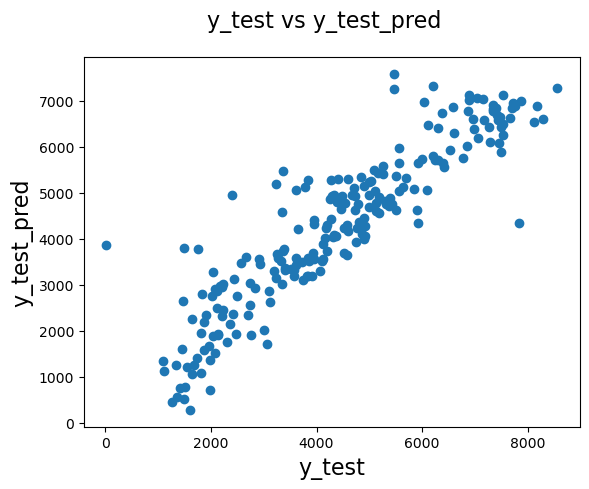

In [93]:
# plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred',fontsize = 16)
plt.xlabel('y_test',fontsize = 16)
plt.ylabel('y_test_pred',fontsize=16)

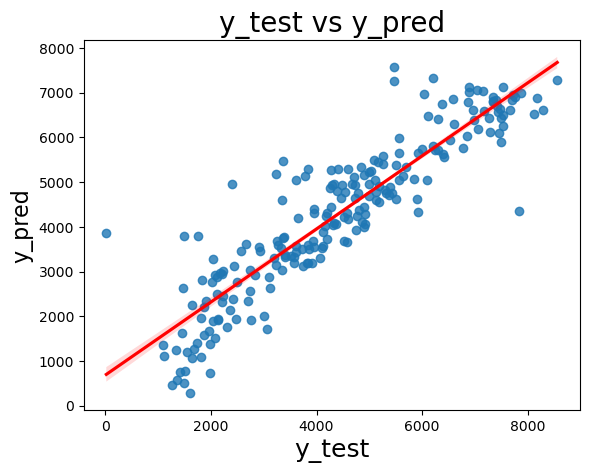

In [102]:
plt.figure()
sns.regplot(x=y_test, y= y_test_pred, ci=68, fit_reg=True, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

<div class="alert alert-block" style="background-color: #f0f4f8; color: #333; border: none; border-radius: 10px; padding: 15px; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.1);">
    <span style='font-family: "Open Sans", sans-serif; font-size: 16px;'>
        <b style="color: #1976d2;">Insight:</b><br>The variance of the residuals stays constant, meaning the error terms don’t change much as the predictor variable's value changes.
    </span>    
</div>


### Plot Test vs Predicted test values

In [95]:
#function to plot actual vs predicted
#takes Actual and Predicted values as input along with the scale and Title to indicate which data

def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act,color="blue",linewidth=2.5,linestyle="-")
    plt.plot(c,pred, color="red", linewidth=2.5,linestyle="-")
    fig.suptitle("Actual and Predicted - "+dataname, fontsize=20) #[plot heading]
    plt.xlabel('Index',fontsize=18)              # X-Label
    plt.ylabel('Counts',fontsize=16)             # Y-Label
    

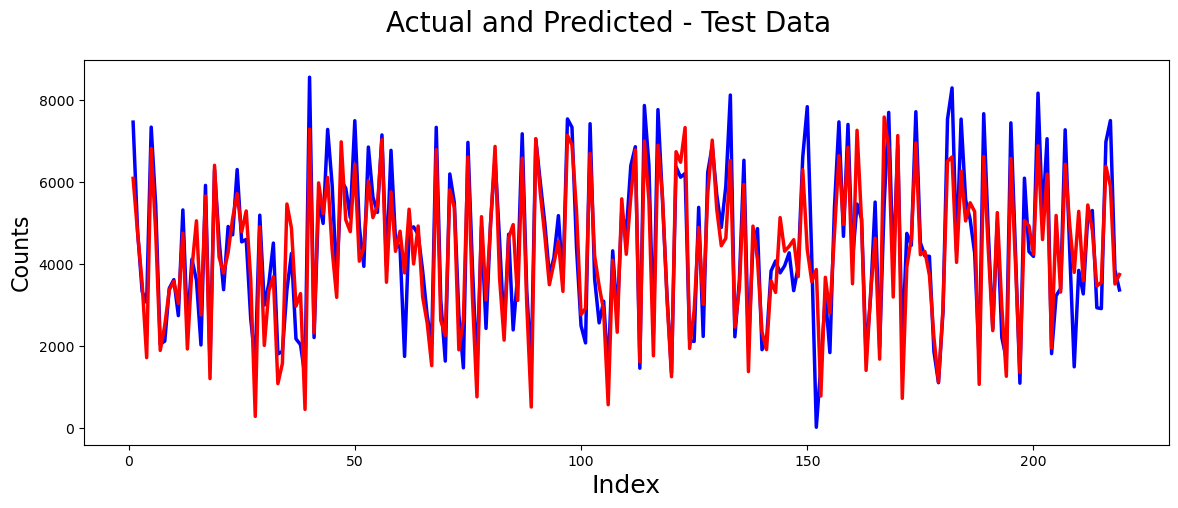

In [96]:
plot_act_pred(y_test,y_test_pred,len(y_test)+1,'Test Data')

<div class="alert alert-block" style="background-color: #f0f4f8; color: #333; border: none; border-radius: 10px; padding: 15px; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.1);">
    <span style='font-family: "Open Sans", sans-serif; font-size: 16px;'>
        <b style="color: #1976d2;">Insight:</b><br>As we can see predictions for test data is very close to actuals
    </span>    
</div>


### Plot Error Terms for test data

In [97]:
# Error terms
def plot_err_terms(act,pred):
    c = [i for i in range(1,220,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act-pred,color='blue',marker='o',linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms',fontsize=20) #plot heading
    plt.xlabel('Index', fontsize=18) # x-label
    plt.ylabel('Counts - Predicted Counts', fontsize = 16)  #Y-label

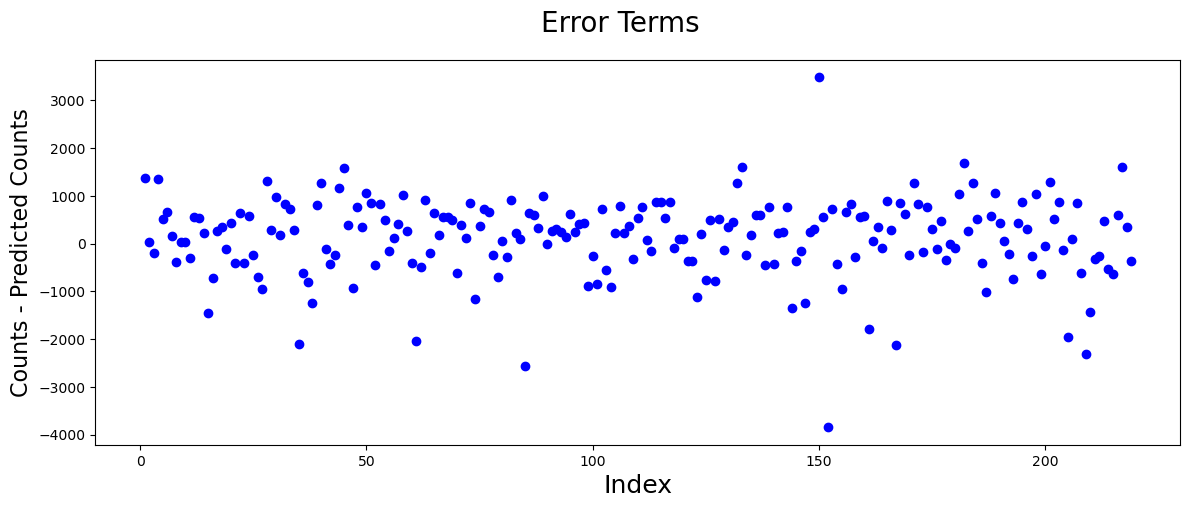

In [98]:
plot_err_terms(y_test,y_test_pred)

<div class="alert alert-block" style="background-color: #f0f4f8; color: #333; border: none; border-radius: 10px; padding: 15px; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.1);">
    <span style='font-family: "Open Sans", sans-serif; font-size: 16px;'>
        <b style="color: #1976d2;">Insight:</b><br>The error terms appear to be randomly distributed without any noticeable pattern, indicating that the model explains the output effectively and there are no missing parameters that could improve the explanation.
    </span>    
</div>


## Making Predictions

In [99]:
# Checking data before scaling 
df_bike.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,days_old,season_spring,season_summer,...,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Clear,weathersit_Light Rain/Snow,weathersit_Misty
0,0,0,1,14.110847,18.18125,80.5833,10.749882,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,1,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,2,1,0,...,0,0,0,0,0,0,1,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,3,1,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,4,1,0,...,0,0,0,0,0,0,0,1,0,0


## Interpretting the Model
Let us go with interpretting the RFE with Manual model results as we give more importance to imputation

In [100]:
# let's build the final model of manual + rfe approach using statsmodel to interpret it simply.

cols = ['year','season_spring','month_july','season_winter','month_sep',
       'weekday_sun','weathersit_Light Rain/Snow','weathersit_Misty','temp']

lm = build_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     246.5
Date:                Mon, 30 Dec 2024   Prob (F-statistic):          9.73e-178
Time:                        17:14:01   Log-Likelihood:                -4160.4
No. Observations:                 511   AIC:                             8341.
Df Residuals:                     501   BIC:                             8383.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [103]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test, y_test_pred)
rsquared_test = r2_score(y_test, y_test_pred)
rsquared_train = r2_score(y_train, y_train_pred)
print('R-squared for train data:',round(rsquared_train,2))
print('R-squared for test data:',round(rsquared_test,2))
print('Mean Squared Error',round(mse,3))

R-squared for train data: 0.82
R-squared for test data: 0.81
Mean Squared Error 694903.119


## Interpretation of results



**Final Relationship between Demand and Predictors:**

The relationship between the demand (`cnt`) and the predictors can be expressed as:


`cnt` = 1740.7372 + 1994.6796 * `year` - 1167.7009 * `season_spring` - 514.6318 * `month_july` 
    + 496.7543 * `season_winter` + 465.9273 * `month_sep` + 190.3752 * `weekday_sun` 
    - 2256.1048 * `weathersit_Light Rain/Snow` - 662.3899 * `weathersit_Misty` + [coefficients for other variables]


Where:
- `year`, `season_spring`, `month_july`, `season_winter`, `month_sep`, `weekday_sun`, `weathersit_Light Rain/Snow`, `weathersit_Misty`, and `temp` are the predictors (input features).
- The intercept value is **1740.7372**.
- Each coefficient corresponds to a feature, indicating how much the demand changes for a unit change in that feature (holding all other variables constant).

In this specific model, we can observe that:
- **year** has a large positive impact (1994.68).
- **season_spring** and **month_july** have negative impacts on demand (−1167.70 and −514.63).
- **season_winter** and **month_sep** have a positive influence on demand (496.75 and 465.93).

---


<div class="alert alert-block" style="background-color: #f0f4f8; color: #333; border: none; border-radius: 10px; padding: 15px; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.1);">
    <span style='font-family: "Open Sans", sans-serif; font-size: 16px;'>
        <b style="color: #1976d2;">Interpretation of Results:</b>
        <ul>
            <li>The company should prioritize business expansion during Spring.</li>
            <li>September also shows potential for growth, and efforts should be made to capitalize on it.</li>
            <li>Based on historical data, a significant increase in user numbers is expected once the situation normalizes compared to 2019.</li>
            <li>Periods with Light Snow or Rain see fewer bookings, making it an ideal time to service the bikes without disrupting business.</li>
        </ul>
    </span>
</div>

<div class="alert alert-block" style="background-color: #fff9db; color: #333; border: none; border-radius: 10px; padding: 15px; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.1);">
    <span style='font-family: "Open Sans", sans-serif; font-size: 16px;'>
        <b style="color: #d4a017;">Recommendation:</b><br>
        When the situation normalizes, the company should introduce new offers during Spring, as the weather is pleasant, and allocate a small budget for advertising in September, as it is expected to be the peak business period.
    </span>
</div>


<div class="alert alert-block" style="background-color: #e8f5e9; color: #333; border: none; border-radius: 10px; padding: 15px; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.1);">
    <span style='font-family: "Open Sans", sans-serif; font-size: 16px;'>
        <b style="color: #388e3c;">Conclusion:</b><br>
        <b>Significant variables to predict the demand for shared bikes:</b>
        <ul>
            <li>Holiday</li>
            <li>Temperature (temp)</li>
            <li>Humidity (humidity)</li>
            <li>Windspeed</li>
            <li>Season</li>
            <li>Months (January, July, September, November, December)</li>
            <li>Year (2019)</li>
            <li>Sunday</li>
            <li>Weathersit (Light Snow, Mist + Cloudy)</li>
        </ul>
    </span>
</div>
